# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Rizki Al-Fathir
- **Email:** Alfthr378@gmail.com
- **ID Dicoding:** petanihandal

## Menentukan Pertanyaan Bisnis

- Pada musim apa penyewaan sepeda mencapai jumlah tertinggi?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?
- Pada waktu apa jumlah penyewaan sepeda paling tinggi dalam sehari? (clustering per jam)

## Import Semua Packages/Library yang Digunakan

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data Wrangling

### Gathering Data

In [3]:
df_day = pd.read_csv('data/day.csv')
df_hour = pd.read_csv('data/hour.csv')

In [4]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
print(df_day.shape, df_hour.shape)
print('jumlah data di day dataset jika dikali per 24 jam : ', 24*len(df_day))
print('jumlah data di hour dataset : ', len(df_hour)) 

(731, 16) (17379, 17)
jumlah data di day dataset jika dikali per 24 jam :  17544
jumlah data di hour dataset :  17379


**Insight:**
- Dataset hour bisa di asumsikan sebagai dataset day per 24 jam, tetapi nilainya berbeda jika dibandingkan karena kemungkinan ada transaksi yang memang tidak terdata
- Analisis data dapat dikatakan bisa dilakukan di kedua dataset sesuai dengan kebutuhan kita

### Assessing Data

#### Day df

In [7]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [8]:
df_day.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [9]:
df_day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [10]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [11]:

def check_outlier(df):
    print('Outlier / jumlah data\n')
    for i in df.select_dtypes(include=['int64', 'float64']).columns:
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5*IQR
        upper = Q3 + 1.5*IQR
        print(f'Outlier {i} : {round(df[(df[i] < lower) | (df[i] > upper)].shape[0] / df.shape[0] * 100,2)}%')

In [12]:
check_outlier(df_day)

Outlier / jumlah data

Outlier instant : 0.0%
Outlier season : 0.0%
Outlier yr : 0.0%
Outlier mnth : 0.0%
Outlier holiday : 2.87%
Outlier weekday : 0.0%
Outlier workingday : 0.0%
Outlier weathersit : 0.0%
Outlier temp : 0.0%
Outlier atemp : 0.0%
Outlier hum : 0.27%
Outlier windspeed : 1.78%
Outlier casual : 6.02%
Outlier registered : 0.0%
Outlier cnt : 0.0%


**Insight:**
- Dataset day bersih dari null dan duplicate value
- persebaran data numerik disana bisa sudah terlihat, yang paling mencolok di field jumlah sepeda yang di sewa per tanggal karena memiliki standar deviasi yang cukup besar
- Terdapat beberapa field yang perlu dirubah tipe datanya
- beberapa field terindikasi memiliki outlier

#### Hour df

In [13]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [14]:
df_hour.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2012-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,NaN,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000


In [15]:
df_hour.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
check_outlier(df_hour)

Outlier / jumlah data

Outlier instant : 0.0%
Outlier season : 0.0%
Outlier yr : 0.0%
Outlier mnth : 0.0%
Outlier hr : 0.0%
Outlier holiday : 2.88%
Outlier weekday : 0.0%
Outlier workingday : 0.0%
Outlier weathersit : 0.02%
Outlier temp : 0.0%
Outlier atemp : 0.0%
Outlier hum : 0.13%
Outlier windspeed : 1.97%
Outlier casual : 6.86%
Outlier registered : 3.91%
Outlier cnt : 2.91%


**Insight:**
- Dataset hour bersih dari null dan duplicate value
- persebaran data numerik disana bisa sudah terlihat, std field jumlah sepeda yang disewakan lebih menyempit dibanding dengan df day
- Terdapat beberapa field yang perlu dirubah tipe datanya
- Beberapa field terindikasi outlier

#### Result Assessing

| Dataset| Tipe Data | Missing Value | Duplicate Data | Inaccurate Value | Outliers |
|-------------|----------|--------------|---------------|------------------|-------|
| day df | perlu adanya perubahan tipe data di kolom dteday, season, yr, mnth, holiday, weekday, weathersit | - | - | - | beberapa field terindikasi terdapat outlier |
| hour df| perlu adanya perubahan data di kolom dteday, season, yr, mnth, holiday, weekday, weathersit | - | - | - | beberapa field terindikasi terdapat outlier |


### Cleaning Data

#### Penanganan Outlier

menggunakan nilai ambang batas untuk mengganti nilai outlier

In [18]:
column_day = ["holiday","hum","windspeed","casual"]
column_hour = ["cnt","registered","casual","windspeed","hum","weathersit","holiday"]
def cap_outliers(df, cols):
    for i in cols : 
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
        df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])
    return df

In [19]:
df_day = cap_outliers(df_day, column_day)
df_hour = cap_outliers(df_hour, column_hour)

In [20]:
check_outlier(df_day)

Outlier / jumlah data

Outlier instant : 0.0%
Outlier season : 0.0%
Outlier yr : 0.0%
Outlier mnth : 0.0%
Outlier holiday : 0.0%
Outlier weekday : 0.0%
Outlier workingday : 0.0%
Outlier weathersit : 0.0%
Outlier temp : 0.0%
Outlier atemp : 0.0%
Outlier hum : 0.0%
Outlier windspeed : 0.0%
Outlier casual : 0.0%
Outlier registered : 0.0%
Outlier cnt : 0.0%


In [21]:
check_outlier(df_hour)

Outlier / jumlah data

Outlier instant : 0.0%
Outlier season : 0.0%
Outlier yr : 0.0%
Outlier mnth : 0.0%
Outlier hr : 0.0%
Outlier holiday : 0.0%
Outlier weekday : 0.0%
Outlier workingday : 0.0%
Outlier weathersit : 0.0%
Outlier temp : 0.0%
Outlier atemp : 0.0%
Outlier hum : 0.0%
Outlier windspeed : 0.0%
Outlier casual : 0.0%
Outlier registered : 0.0%
Outlier cnt : 0.0%


#### Merubah tipe data beberapa field

##### Day df

In [22]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])

merubah field yr agar sinkron dengan field dteday

In [23]:
df_day['yr'] = df_day['dteday'].dt.year

In [24]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int32         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    float64       
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    float64       
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

##### Hour df

In [25]:
df_hour['dteday'] = pd.to_datetime(df_hour['dteday'])

merubah field yr agar sinkron dengan field dteday

In [26]:
df_hour['yr'] = df_hour['dteday'].dt.year

In [27]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  float64       
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  float64       
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  float64       
 15  registered  17379 non-null  float64       
 16  cnt         17379 non-

#### Mapping field yang seharusnya kategorikal

menggunakan map untuk mapping field yang lebih baik disajikan dalam bentuk kategorikal

In [28]:
season = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

month = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

weekday = {
    0: 'Sun',
    1: 'Mon',
    2: 'Tue',
    3: 'Wed',
    4: 'Thu',
    5: 'Fri',
    6: 'Sat'
}

weathersit = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light rain/snow',
    4: 'Heavy Rain/snow'
}

workingday = {
    0: 'Holiday',
    1: 'Working Day'
}

holiday = {
    0: 'No',
    1: 'Yes'
}

##### Day df

In [29]:
df_day['season'] = df_day['season'].map(season)
df_day['mnth'] = df_day['mnth'].map(month)
df_day['weekday'] = df_day['weekday'].map(weekday)
df_day['weathersit'] = df_day['weathersit'].map(weathersit)
df_day['workingday'] = df_day['workingday'].map(workingday)
df_day['holiday'] = df_day['holiday'].map(holiday)

##### Hour df

In [30]:

df_hour['season'] = df_hour['season'].map(season)
df_hour['mnth'] = df_hour['mnth'].map(month)
df_hour['weekday'] = df_hour['weekday'].map(weekday)
df_hour['weathersit'] = df_hour['weathersit'].map(weathersit)
df_hour['workingday'] = df_hour['workingday'].map(workingday)
df_hour['holiday'] = df_hour['holiday'].map(holiday)

#### Reverse normalisasi Data pada Parameter Cuaca dan Kondisi Lingkungan

mengubah nilai yang sebelumnya sudah di normalisasi untuk lebih mudah dibaca

In [31]:
df_day['temp'] = df_day['temp'] * 41
df_day['atemp'] = df_day['atemp'] * 50
df_day['hum'] = df_day['hum'] * 100
df_day['windspeed'] = df_day['windspeed'] * 67

df_hour['temp'] = df_hour['temp'] * 41
df_hour['atemp'] = df_hour['atemp'] * 50
df_hour['hum'] = df_hour['hum'] * 100
df_hour['windspeed'] = df_hour['windspeed'] * 67

In [32]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,No,Sat,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,331.0,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,131.0,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120.0,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108.0,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82.0,1518,1600


In [33]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    object        
 3   yr          731 non-null    int32         
 4   mnth        731 non-null    object        
 5   holiday     731 non-null    object        
 6   weekday     731 non-null    object        
 7   workingday  731 non-null    object        
 8   weathersit  731 non-null    object        
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    float64       
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [34]:
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,No,Sat,Holiday,Clear,9.84,14.395,81.0,0.0,3.0,13.0,16.0
1,2,2011-01-01,Spring,2011,Jan,1,No,Sat,Holiday,Clear,9.02,13.635,80.0,0.0,8.0,32.0,40.0
2,3,2011-01-01,Spring,2011,Jan,2,No,Sat,Holiday,Clear,9.02,13.635,80.0,0.0,5.0,27.0,32.0
3,4,2011-01-01,Spring,2011,Jan,3,No,Sat,Holiday,Clear,9.84,14.395,75.0,0.0,3.0,10.0,13.0
4,5,2011-01-01,Spring,2011,Jan,4,No,Sat,Holiday,Clear,9.84,14.395,75.0,0.0,0.0,1.0,1.0


In [35]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  object        
 3   yr          17379 non-null  int32         
 4   mnth        17379 non-null  object        
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  object        
 7   weekday     17379 non-null  object        
 8   workingday  17379 non-null  object        
 9   weathersit  17376 non-null  object        
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  float64       
 15  registered  17379 non-null  float64       
 16  cnt         17379 non-

In [36]:
bins = [0, 6, 12, 18, 24]
labels = ['Midnight', 'Morning', 'Noon', 'Afternoon']
df_hour_copy = df_hour.copy()
df_hour_copy['hr_group'] = pd.cut(df_hour_copy['hr'], bins=bins, labels=labels, right=False)

In [37]:
df_day.to_csv('df_day_clean.csv', index=False)
df_hour_copy.to_csv('df_hour_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Descriptive Statistic

#### Day df

In [38]:
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,No,Sat,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,331.0,654,985
1,2,2011-01-02,Spring,2011,Jan,No,Sun,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,131.0,670,801
2,3,2011-01-03,Spring,2011,Jan,No,Mon,Working Day,Clear,8.050924,9.47025,43.7273,16.636703,120.0,1229,1349
3,4,2011-01-04,Spring,2011,Jan,No,Tue,Working Day,Clear,8.200000,10.60610,59.0435,10.739832,108.0,1454,1562
4,5,2011-01-05,Spring,2011,Jan,No,Wed,Working Day,Clear,9.305237,11.46350,43.6957,12.522300,82.0,1518,1600


In [39]:
cat_day = df_day.select_dtypes(include='object').columns
num_day = df_day.select_dtypes(include=['int64', 'float64']).columns

In [40]:
df_day[num_day].describe()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,20.310776,23.717699,62.819701,12.719667,824.388509,3656.172367,4504.348837
std,211.165812,7.505091,8.148059,14.132022,5.068137,623.642956,1560.256377,1937.211452
min,1.000000,2.424346,3.953480,20.468725,1.500244,2.000000,20.000000,22.000000
25%,183.500000,13.820424,16.892125,52.000000,9.041650,315.500000,2497.000000,3152.000000
50%,366.000000,20.431653,24.336650,62.666700,12.125325,713.000000,3662.000000,4548.000000
75%,548.500000,26.872076,30.430100,73.020850,15.625371,1096.000000,4776.500000,5956.000000
max,731.000000,35.328347,42.044800,97.250000,25.500954,2266.750000,6946.000000,8714.000000


Histogram untuk tiap field numeriknya adalah sebagai berikut

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'hum'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'cnt'}>, <Axes: >, <Axes: >]],
      dtype=object)

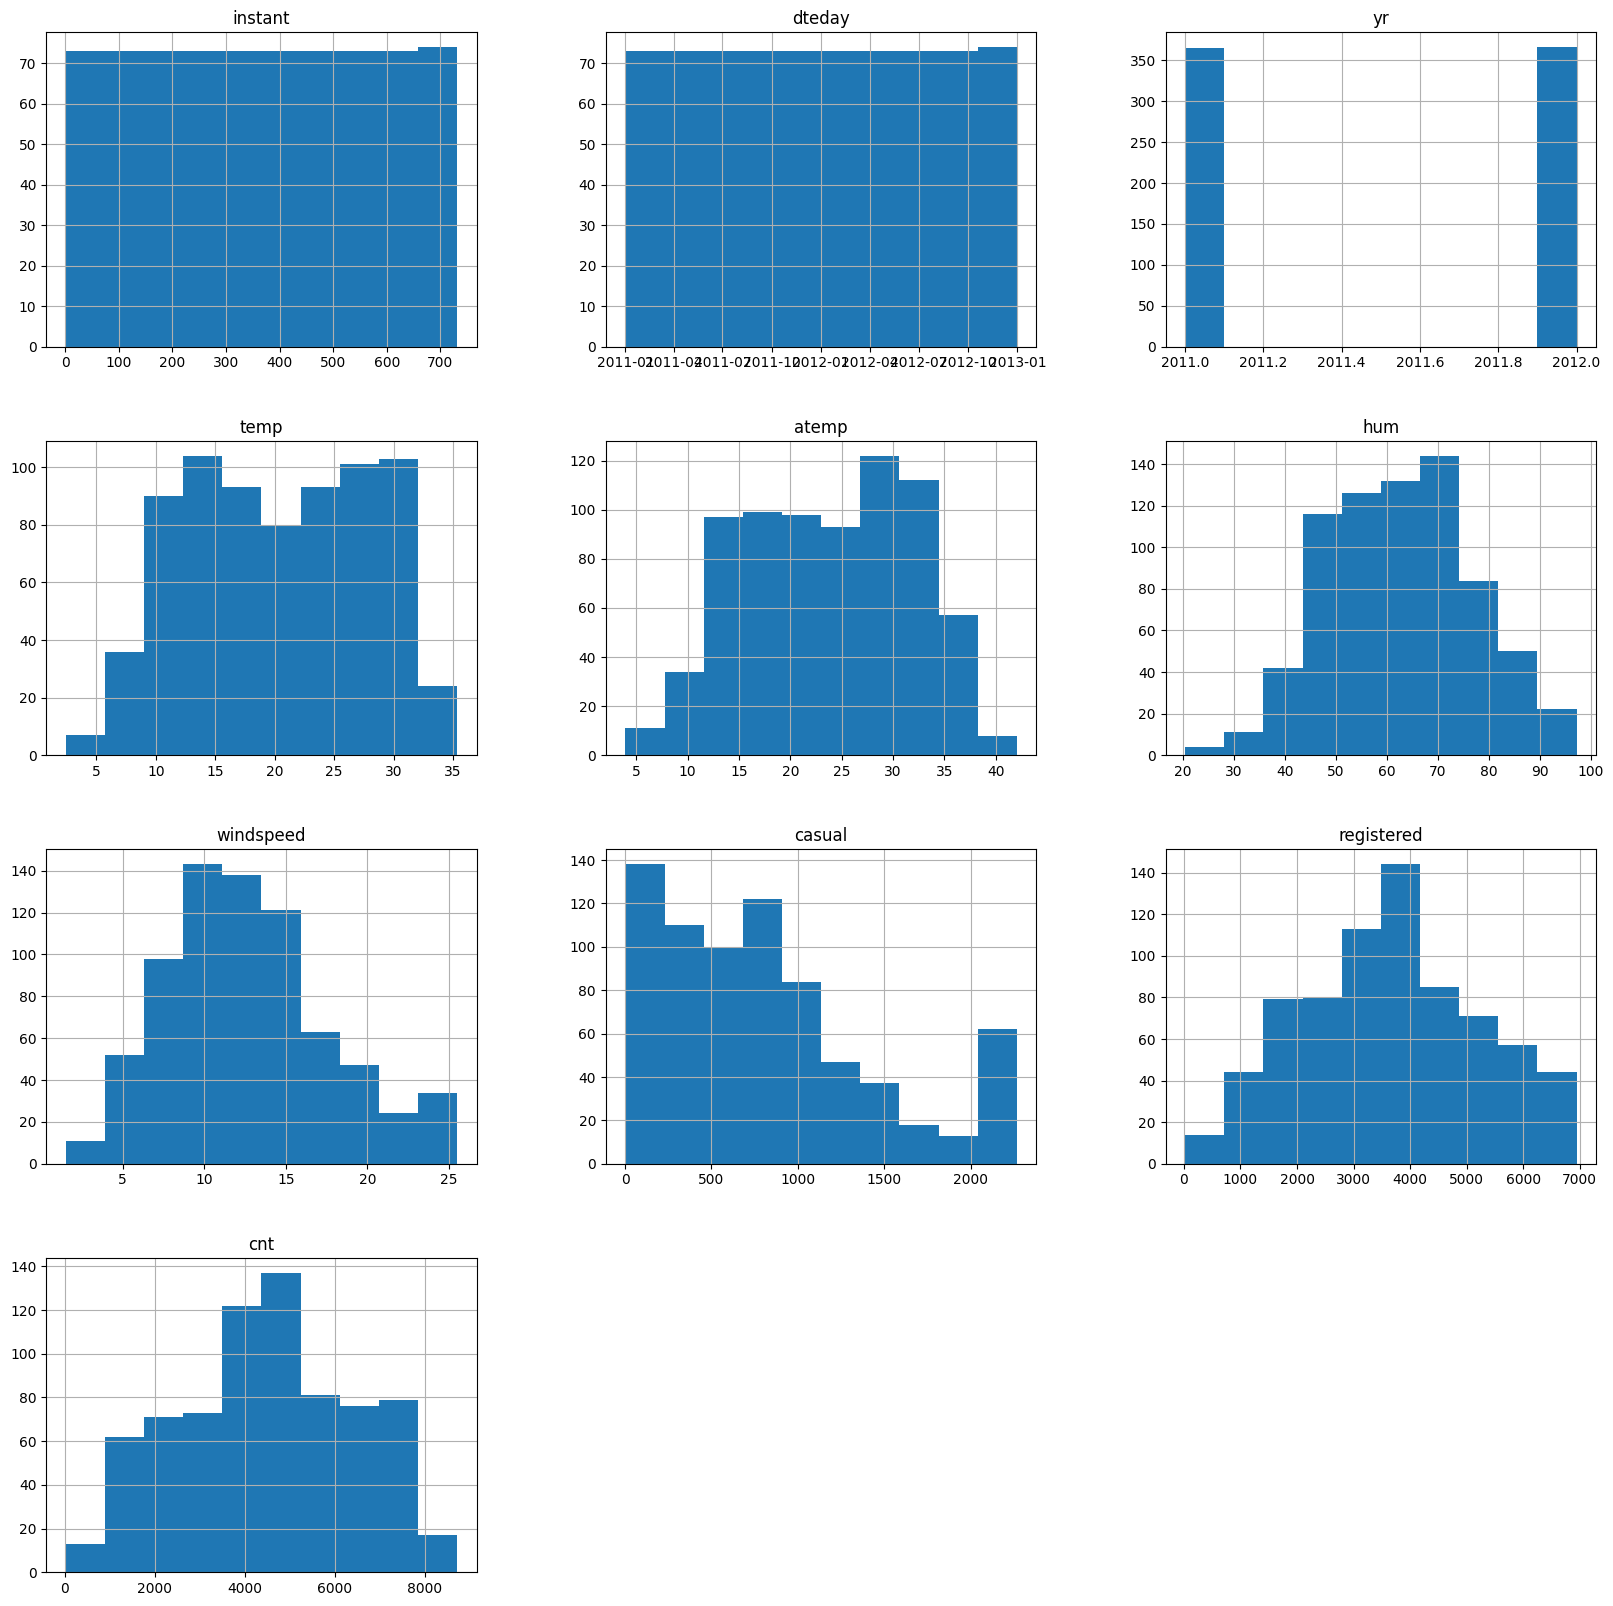

In [41]:
df_day.hist(figsize=(20, 20))

dapat dilihat beberapa persebaran data simetris, tetapi ada juga yang skew

In [42]:
df_day[cat_day].describe()

,season,mnth,holiday,weekday,workingday,weathersit
count,731,731,731,731,731,731
unique,4,12,1,7,2,3
top,Fall,Jan,No,Sat,Working Day,Clear
freq,188,62,731,105,500,463


dari hasil statistik diatas, sudah dapat di sebutkan bahwa cuaca yang cerah di musim gugur itu menjadi kondisi favorit menyewa sepeda

#### Hour df

In [43]:
cat_hour = df_hour.select_dtypes(include='object').columns
num_hour = df_hour.select_dtypes(include=['int64', 'float64']).columns

In [44]:
df_hour[num_hour].describe()

,instant,hr,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,11.546752,20.376474,23.788755,62.726682,12.642275,31.158812,148.645204,186.361327
std,5017.0295,6.914405,7.894801,8.592511,19.280927,7.919208,34.813147,135.351791,171.931168
min,1.0000,0.000000,0.820000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,6.000000,13.940000,16.665000,48.000000,7.001500,4.000000,34.000000,40.000000
50%,8690.0000,12.000000,20.500000,24.240000,63.000000,12.998000,17.000000,115.000000,142.000000
75%,13034.5000,18.000000,27.060000,31.060000,78.000000,16.997900,48.000000,220.000000,281.000000
max,17379.0000,23.000000,41.000000,50.000000,100.000000,31.992500,114.000000,499.000000,642.500000


Histogram untuk field numeric nya sebagai berikut

array([[<Axes: title={'center': 'instant'}>,
        <Axes: title={'center': 'dteday'}>,
        <Axes: title={'center': 'yr'}>],
       [<Axes: title={'center': 'hr'}>, <Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>],
       [<Axes: title={'center': 'hum'}>,
        <Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>],
       [<Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'cnt'}>, <Axes: >]], dtype=object)

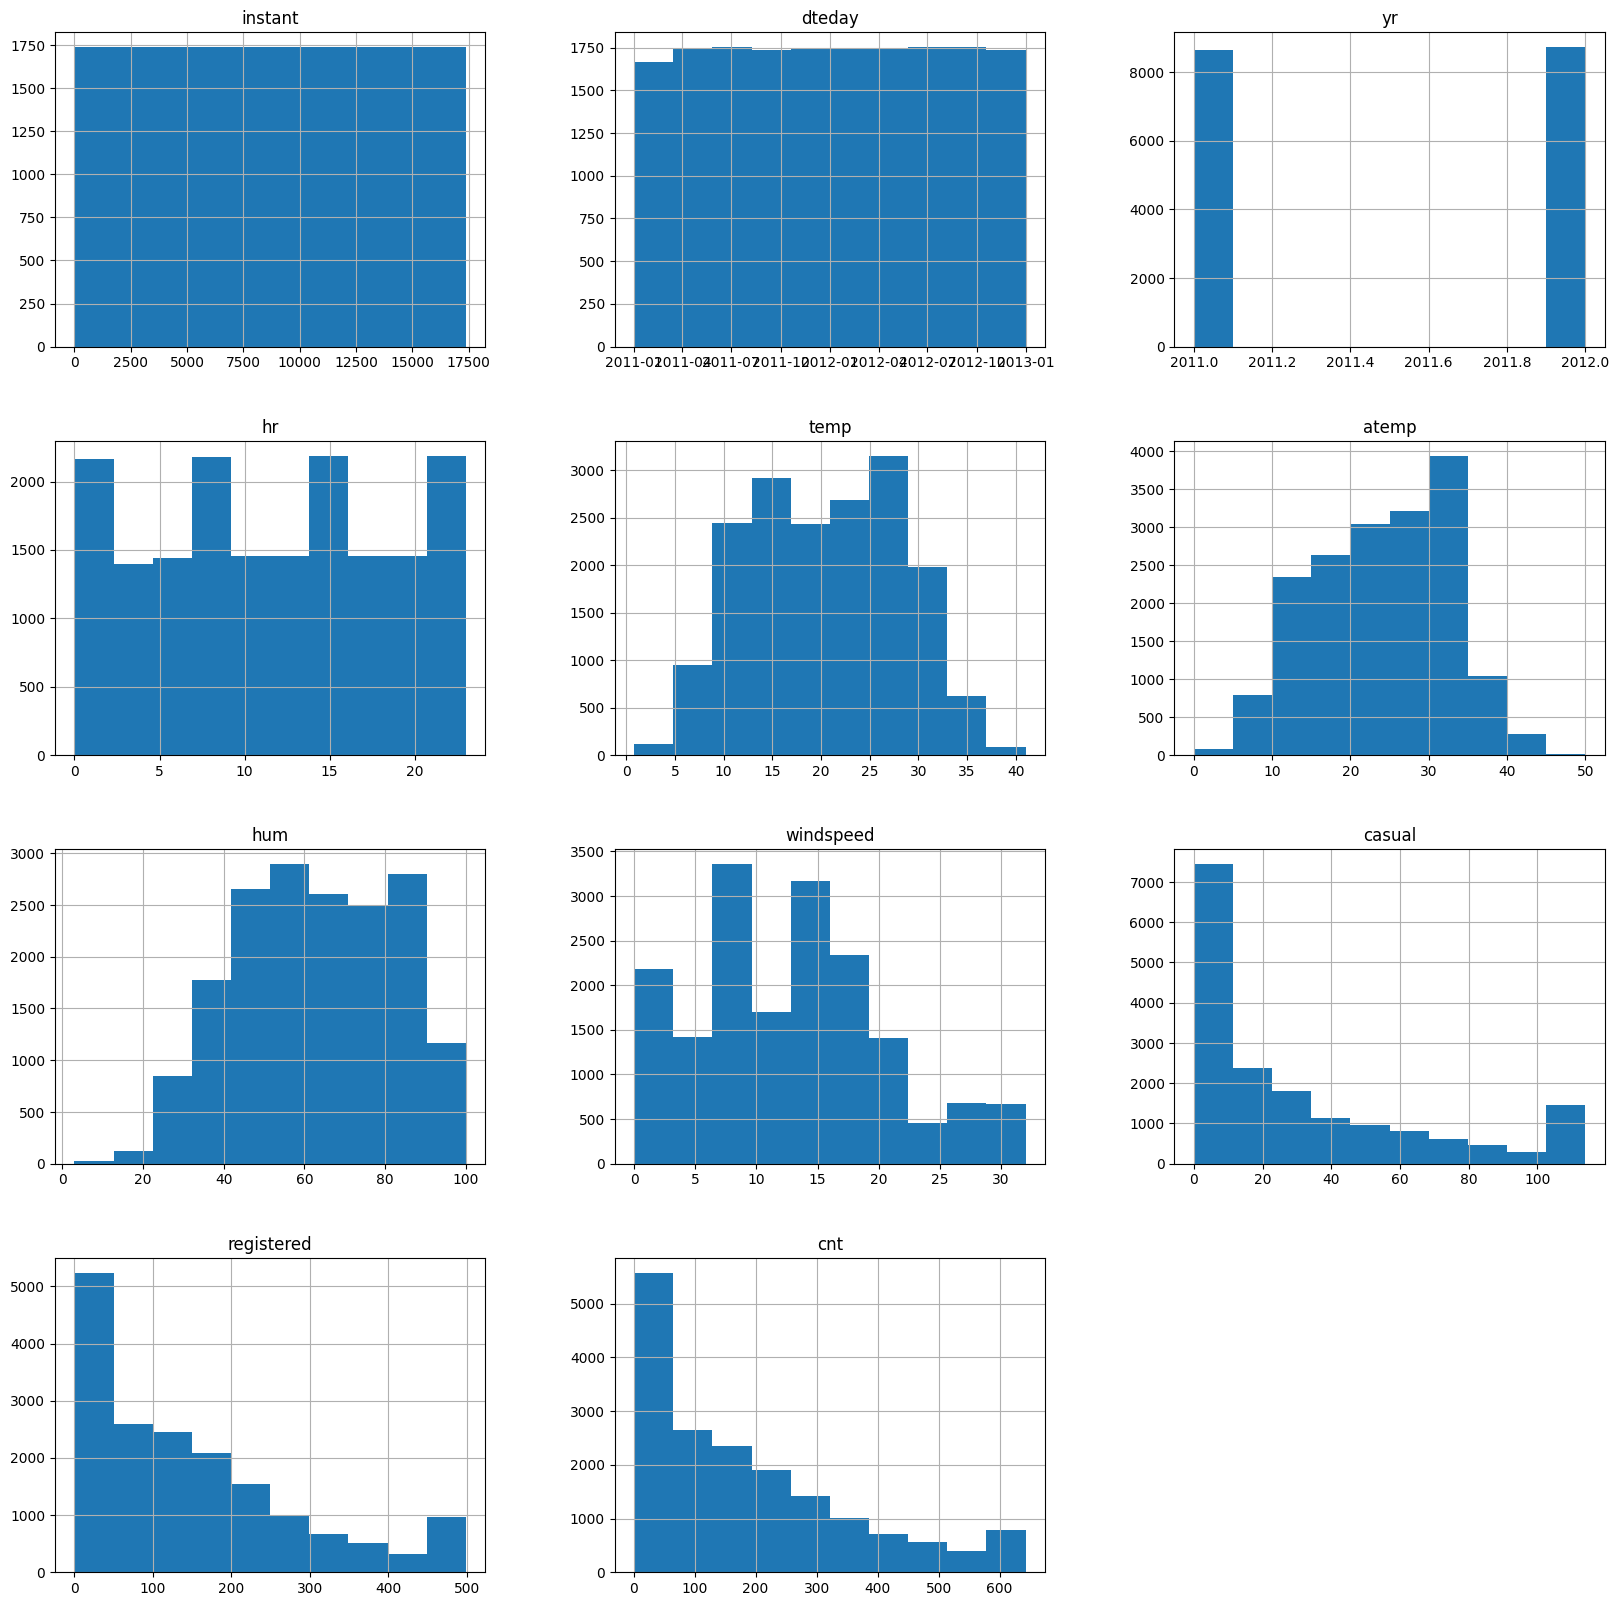

In [45]:
df_hour.hist(figsize=(20, 20))

di hour df, field yang simetris di day df ternyata skew di hour df, ini bisa terjadi karena hour df berdasarkan waktu yang menyebabkan jumlah data yang melonjak tinggi

In [46]:
df_hour[cat_hour].describe()

,season,mnth,holiday,weekday,workingday,weathersit
count,17379,17379,17379,17379,17379,17376
unique,4,12,1,7,2,3
top,Fall,Jul,No,Sat,Working Day,Clear
freq,4496,1488,17379,2512,11865,11413


statistik diatas juga sesuai dengan statistik day df

### Eksplorasi Pengelompokan data

#### Day df

menghitung jumlah dan rata rata penyewaan berdasarkan musim

In [47]:
df_day_season = df_day.groupby(by='season').agg({
    'cnt' : ['sum','mean'],
    'casual' : ['sum','mean'],
    'registered' : ['sum','mean']

})
df_day_season

cnt                  casual              registered             
            sum         mean        sum         mean        sum         mean
season                                                                      
Fall    1061129  5644.303191  221025.00  1175.664894     835038  4441.691489
Spring   471348  2604.132597   59733.75   330.020718     410726  2269.204420
Summer   918589  4992.331522  194430.00  1056.684783     715067  3886.233696
Winter   841613  4728.162921  127439.25   715.950843     711831  3999.050562

masih sejalan dengan analisis descriptive statistic, musim fall menjadi musim yang paling banyak penyewaan sepeda

menghitung jumlah dan rata rata penyewaan berdasarkan weathersit

In [48]:
df_day_weather = df_day.groupby(by='weathersit').agg({
    'cnt' : ['sum','mean'],
    'casual' : ['sum','mean'],
    'registered' : ['sum','mean']
})
df_day_weather

cnt                 casual             registered  \
                     sum         mean       sum        mean        sum   
weathersit                                                               
Clear            2257952  4876.786177  432378.0  933.861771    1811606   
Light rain/snow    37869  1803.285714    3895.0  185.476190      33974   
Mist              996858  4035.862348  166355.0  673.502024     827082   

                              
                        mean  
weathersit                    
Clear            3912.755940  
Light rain/snow  1617.809524  
Mist             3348.510121

begitupun juga dengan cuaca, penyewaan sepeda cenderung terjadi ketika cuaca clear

#### Hour df

In [49]:
df_hour_season = df_hour.groupby(by='season').agg({
    'cnt' : ['sum','mean'],
    'casual' : ['sum','mean'],
    'registered' : ['sum','mean']
})
df_hour_season

cnt                casual            registered            
              sum        mean       sum       mean        sum        mean
season                                                                   
Fall    1036361.0  230.507340  200543.0  44.604760   797822.0  177.451512
Spring   470025.5  110.802805   56723.0  13.371759   407806.0   96.135314
Summer   906001.0  205.489000  170852.0  38.750737   691767.0  156.898843
Winter   826386.0  195.270794  113391.0  26.793715   685910.0  162.077032

In [50]:
df_hour_weather = df_hour.groupby(by='weathersit').agg({
    'cnt' : ['sum','mean'],
    'casual' : ['sum','mean'],
    'registered' : ['sum','mean']
})
df_hour_weather

cnt                casual            registered  \
                       sum        mean       sum       mean        sum   
weathersit                                                               
Clear            2294665.5  201.057172  398061.0  34.877859  1807610.0   
Light rain/snow   156923.0  110.587033   21150.0  14.904863   132861.0   
Mist              786962.0  173.187060  122290.0  26.912412   642619.0   

                             
                       mean  
weathersit                   
Clear            158.381670  
Light rain/snow   93.630021  
Mist             141.421435

berlaku juga di hour df untuk statistik berdasarkan cuaca dan musim

In [51]:
bins = [0, 6, 12, 18, 24]
labels = ['Midnight', 'Morning', 'Noon', 'Afternoon']
df_hour_copy = df_hour.copy()
df_hour_copy['hr_group'] = pd.cut(df_hour_copy['hr'], bins=bins, labels=labels, right=False)
df_hour_copy_group = df_hour_copy.groupby(by='hr_group').agg({
    'cnt' : ['sum','mean'],
    'casual' : ['sum','mean'],
    'registered' : ['sum','mean']
})

df_hour_copy_group

C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\2914699442.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour_copy_group = df_hour_copy.groupby(by='hr_group').agg({


cnt                casual            registered            
                 sum        mean       sum       mean        sum        mean
hr_group                                                                    
Midnight    106509.0   24.908559   19275.0   4.507717    87234.0   20.400842
Morning     898605.5  206.102179  118297.0  27.132339   752929.0  172.690138
Noon       1265541.5  289.266629  256583.0  58.647543   939578.0  214.760686
Afternoon   968117.5  221.638622  147354.0  33.734890   803564.0  183.966117

Pada analisis ini, dilakukan binning pada field hour untuk melihat kapan waktu yang paling banyak terjadi penyewaan sepeda

### Analisis Multivariate

#### Hubungan jumlah Sewa dengan musim per hari dan per jam

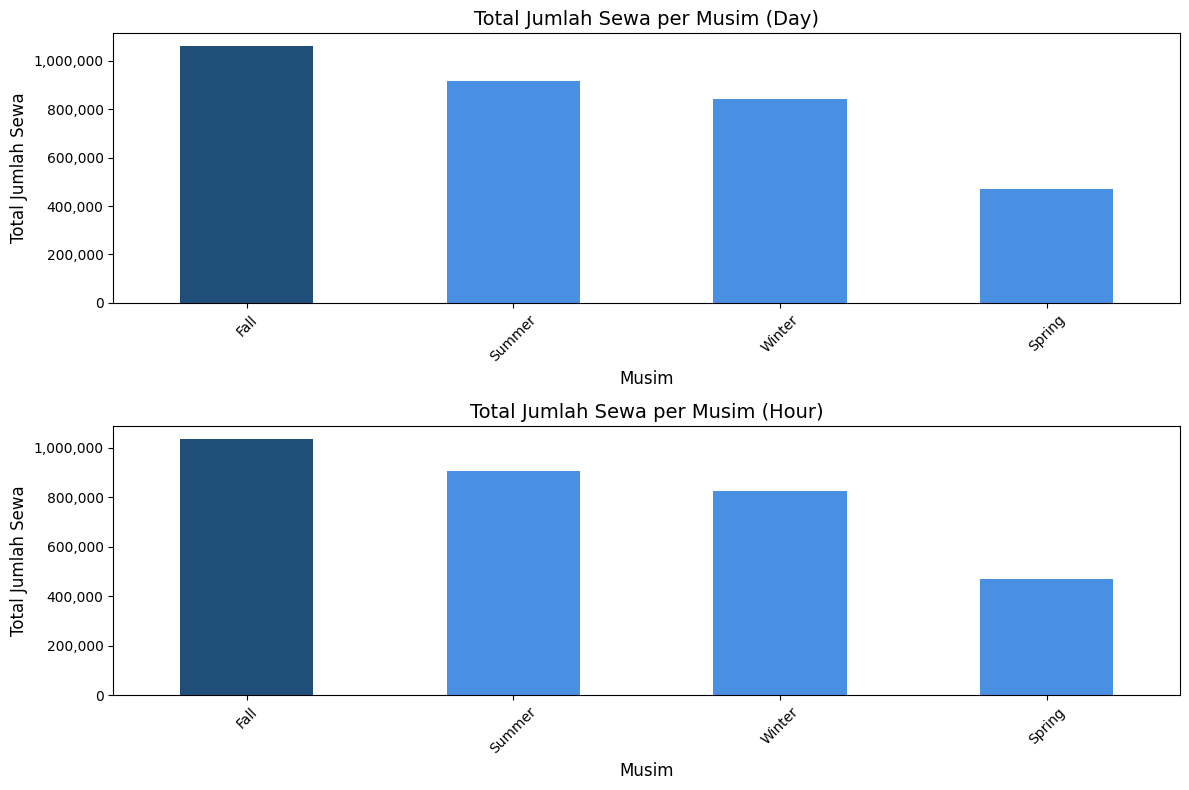

In [52]:
def visual_relation_season(df_day, df_hour):
    colors = ["#1F4E79", "#4A90E2", "#4A90E2", "#4A90E2"]
    fig, ax = plt.subplots(2, 1, figsize=(12, 8))  # Reduced height from 18 to 8

    df_day_season_sum = df_day.groupby(by='season')['cnt'].sum().sort_values(ascending=False)
    df_hour_season_sum = df_hour.groupby(by='season')['cnt'].sum().sort_values(ascending=False)

    df_day_season_sum.plot(kind='bar', ax=ax[0], color=colors)
    ax[0].set_title('Total Jumlah Sewa per Musim (Day)', fontsize=14)
    ax[0].set_xlabel('Musim', fontsize=12)
    ax[0].set_ylabel('Total Jumlah Sewa', fontsize=12)
    ax[0].tick_params(axis='x', rotation=45)
    ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    fig.tight_layout()

    df_hour_season_sum.plot(kind='bar', ax=ax[1], color=colors)
    ax[1].set_title('Total Jumlah Sewa per Musim (Hour)', fontsize=14)
    ax[1].set_xlabel('Musim', fontsize=12)
    ax[1].set_ylabel('Total Jumlah Sewa', fontsize=12)
    ax[1].tick_params(axis='x', rotation=45)
    ax[1].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
    fig.tight_layout()

visual_relation_season(df_day, df_hour)


#### korelasi antar field numerik

In [53]:
df_day[num_day].corr()

,instant,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.150580,0.152638,0.013469,-0.112573,0.276639,0.659623,0.628830
temp,0.150580,1.000000,0.991702,0.126722,-0.156916,0.573796,0.540012,0.627494
atemp,0.152638,0.991702,1.000000,0.139924,-0.182948,0.574245,0.544192,0.631066
hum,0.013469,0.126722,0.139924,1.000000,-0.241160,-0.075118,-0.095985,-0.105664
windspeed,-0.112573,-0.156916,-0.182948,-0.241160,1.000000,-0.178155,-0.216927,-0.233657
casual,0.276639,0.573796,0.574245,-0.075118,-0.178155,1.000000,0.414917,0.684547
registered,0.659623,0.540012,0.544192,-0.095985,-0.216927,0.414917,1.000000,0.945517
cnt,0.628830,0.627494,0.631066,-0.105664,-0.233657,0.684547,0.945517,1.000000


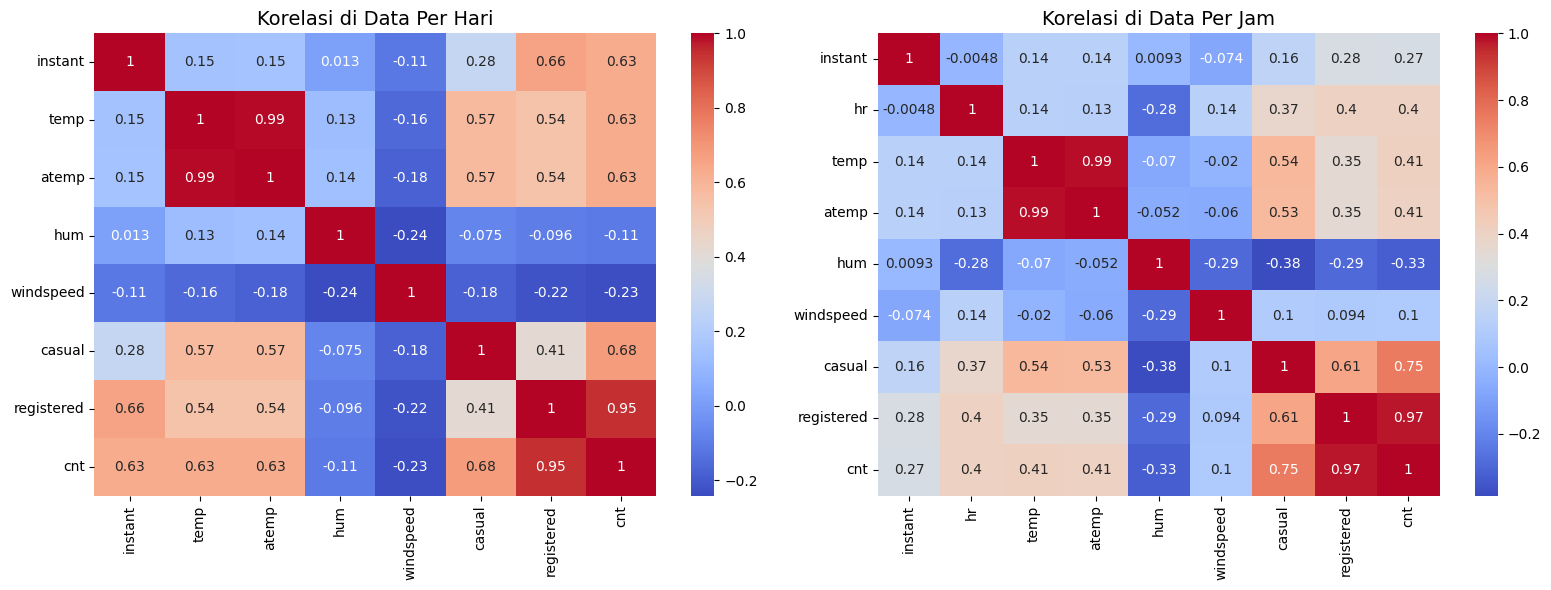

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # 1 baris, 2 kolom (day & hour)

# Heatmap untuk df_day (kolom kiri)
sns.heatmap(df_day[num_day].corr(), annot=True, cmap='coolwarm', ax=ax[0])
ax[0].set_title('Korelasi di Data Per Hari', fontsize=14)

# Heatmap untuk df_hour (kolom kanan)
sns.heatmap(df_hour[num_hour].corr(), annot=True, cmap='coolwarm', ax=ax[1])
ax[1].set_title('Korelasi di Data Per Jam', fontsize=14)

plt.tight_layout()
plt.show()


Dari heatmap di atas, beberapa hubungan antar field dapat terlihat. Contohnya, cnt memiliki korelasi positif dengan temp, yang menunjukkan bahwa penyewaan cenderung lebih tinggi saat suhu lebih hangat.

#### Hubungan antara Jumlah sewa dan Cuaca

C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\954841262.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='weathersit', y='cnt', data=df_day.sort_values(by='cnt',ascending=False), palette='viridis', inner='quartile', ax=ax[1, 0])
C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\954841262.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='weathersit', y='cnt', data=df_day.sort_values(by='cnt',ascending=False), jitter=True, alpha=0.5, palette='viridis', ax=ax[2, 0])
C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\954841262.py:23: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplo

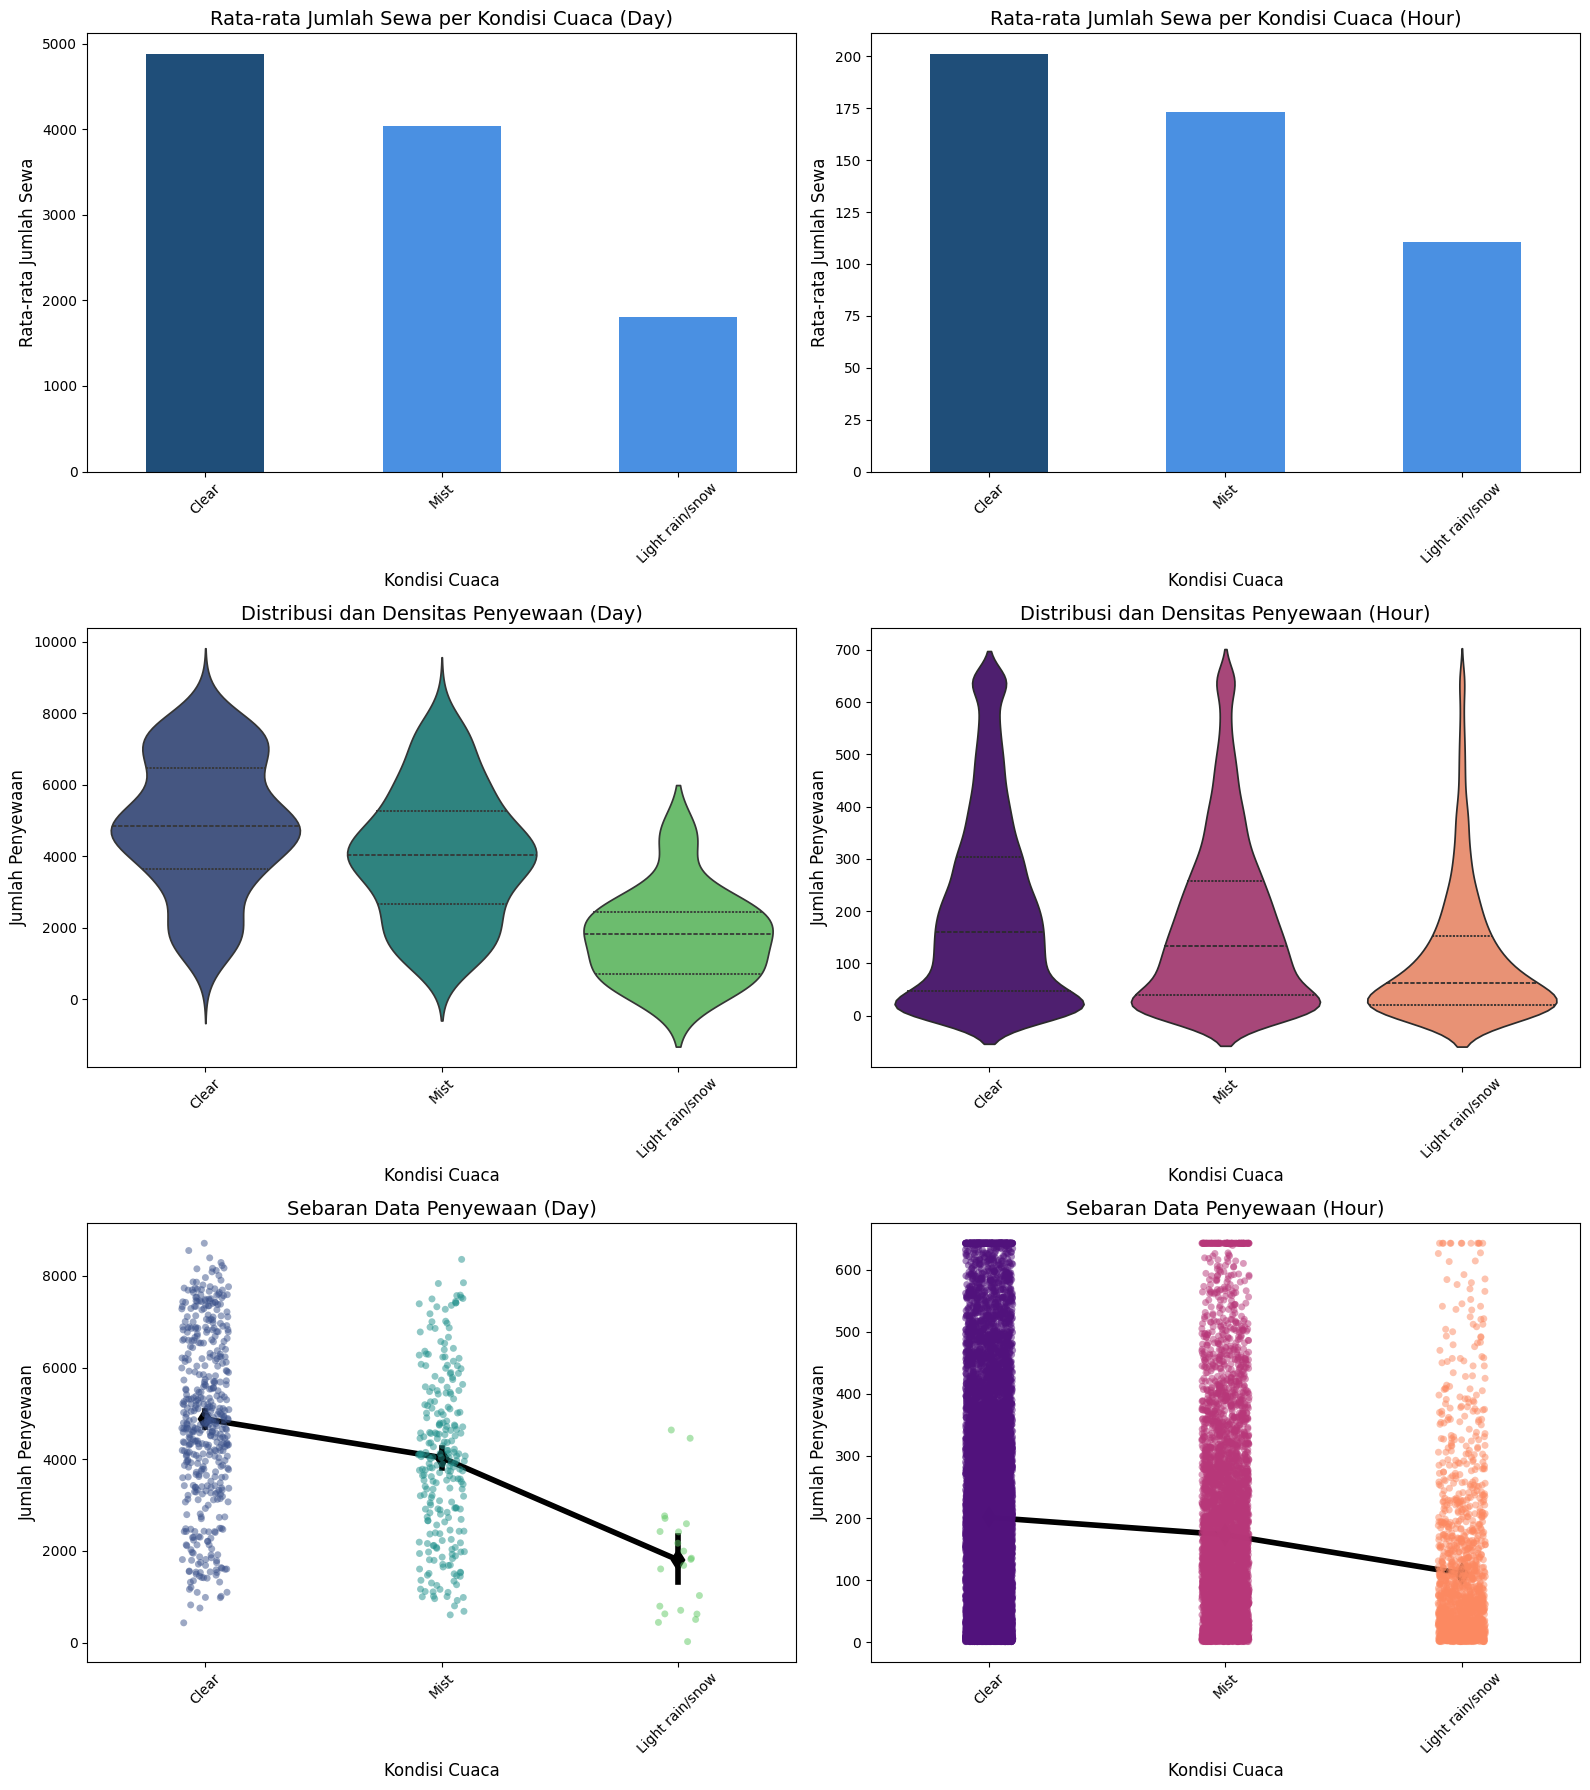

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

def visual_relation(df_day, df_hour):
    fig, ax = plt.subplots(3, 2, figsize=(16, 18))  # 3 baris, 2 kolom (day & hour)

    colors = ["#1F4E79", "#4A90E2", "#4A90E2", "#4A90E2"]

    df_day_weather_mean = df_day.groupby('weathersit').agg({'cnt': 'mean'}).sort_values(by='cnt', ascending=False).reset_index()
    df_day_weather_mean.plot(kind='bar', x='weathersit', y='cnt', legend=False, ax=ax[0, 0], color=colors)
    ax[0, 0].set_title('Rata-rata Jumlah Sewa per Kondisi Cuaca (Day)', fontsize=14)
    ax[0, 0].set_xlabel('Kondisi Cuaca', fontsize=12)
    ax[0, 0].set_ylabel('Rata-rata Jumlah Sewa', fontsize=12)
    ax[0, 0].tick_params(axis='x', rotation=45)

    sns.violinplot(x='weathersit', y='cnt', data=df_day.sort_values(by='cnt',ascending=False), palette='viridis', inner='quartile', ax=ax[1, 0])
    ax[1, 0].set_title('Distribusi dan Densitas Penyewaan (Day)', fontsize=14)
    ax[1, 0].set_xlabel('Kondisi Cuaca', fontsize=12)
    ax[1, 0].set_ylabel('Jumlah Penyewaan', fontsize=12)
    ax[1, 0].tick_params(axis='x', rotation=45)

    sns.stripplot(x='weathersit', y='cnt', data=df_day.sort_values(by='cnt',ascending=False), jitter=True, alpha=0.5, palette='viridis', ax=ax[2, 0])
    sns.pointplot(x='weathersit', y='cnt', data=df_day.sort_values(by='cnt',ascending=False), color='black', markers='d', scale=1.5, ax=ax[2, 0])
    ax[2, 0].set_title('Sebaran Data Penyewaan (Day)', fontsize=14)
    ax[2, 0].set_xlabel('Kondisi Cuaca', fontsize=12)
    ax[2, 0].set_ylabel('Jumlah Penyewaan', fontsize=12)
    ax[2, 0].tick_params(axis='x', rotation=45)


    df_hour_weather_mean = df_hour.groupby('weathersit').agg({'cnt': 'mean'}).sort_values(by='cnt', ascending=False).reset_index()
    df_hour_weather_mean.plot(kind='bar', x='weathersit', y='cnt', legend=False, ax=ax[0, 1], color=colors)
    ax[0, 1].set_title('Rata-rata Jumlah Sewa per Kondisi Cuaca (Hour)', fontsize=14)
    ax[0, 1].set_xlabel('Kondisi Cuaca', fontsize=12)
    ax[0, 1].set_ylabel('Rata-rata Jumlah Sewa', fontsize=12)
    ax[0, 1].tick_params(axis='x', rotation=45)

    sns.violinplot(x='weathersit', y='cnt', data=df_hour.sort_values(by='cnt',ascending=False), palette='magma', inner='quartile', ax=ax[1, 1])
    ax[1, 1].set_title('Distribusi dan Densitas Penyewaan (Hour)', fontsize=14)
    ax[1, 1].set_xlabel('Kondisi Cuaca', fontsize=12)
    ax[1, 1].set_ylabel('Jumlah Penyewaan', fontsize=12)
    ax[1, 1].tick_params(axis='x', rotation=45)

    sns.stripplot(x='weathersit', y='cnt', data=df_hour.sort_values(by='cnt',ascending=False), jitter=True, alpha=0.5, palette='magma', ax=ax[2, 1])
    sns.pointplot(x='weathersit', y='cnt', data=df_hour.sort_values(by='cnt',ascending=False), color='black', markers='d', scale=1.5, ax=ax[2, 1])
    ax[2, 1].set_title('Sebaran Data Penyewaan (Hour)', fontsize=14)
    ax[2, 1].set_xlabel('Kondisi Cuaca', fontsize=12)
    ax[2, 1].set_ylabel('Jumlah Penyewaan', fontsize=12)
    ax[2, 1].tick_params(axis='x', rotation=45)

    fig.tight_layout()
    plt.show()

# Call the function
visual_relation(df_day, df_hour)


visualisasi diatas cukup jelas menggambarkan bahwa penyewaan itu ada hubungannya dengan kondisi cuaca, dimana penyewaan cenderung ramai ketika cerah

begitupula dengan musim, musim yang hangat dan cerah seperti Fall itu menjadi musim yang paling banyak penyewaan

#### Hubungan jumlah sewa dengan waktu

C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\2424334115.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour_group_sum = df_hour_copy.groupby(by='hr_group')['cnt'].sum().sort_values(ascending=False)


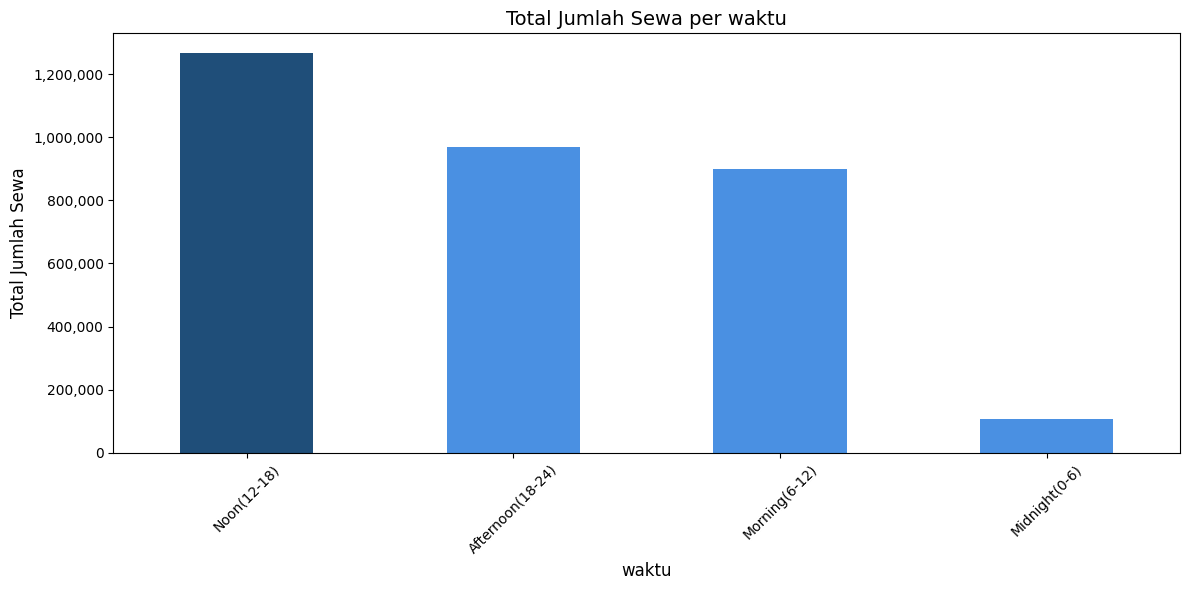

In [56]:
def visual_relation_hour(df_hour_copy):

    fig, ax = plt.subplots(figsize=(12, 6))
    colors = ["#1F4E79", "#4A90E2", "#4A90E2", "#4A90E2"]

    df_hour_group_sum = df_hour_copy.groupby(by='hr_group')['cnt'].sum().sort_values(ascending=False)
    df_hour_group_sum.plot(kind='bar', ax=ax, color=colors)
    ax.set_title('Total Jumlah Sewa per waktu', fontsize=14)
    ax.set_xlabel('waktu', fontsize=12)
    ax.set_ylabel('Total Jumlah Sewa', fontsize=12)
    ax.tick_params(axis='x', rotation=45)

    time_ranges = {
        'Midnight': 'Midnight(0-6)',
        'Morning': 'Morning(6-12)',
        'Noon': 'Noon(12-18)',
        'Afternoon': 'Afternoon(18-24)'
    }

    ax.set_xticklabels([time_ranges[label.get_text()] for label in ax.get_xticklabels()])
    ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

    fig.tight_layout()
    plt.show()

visual_relation_hour(df_hour_copy)

visualisasi diatas memberikan gambaran bahwa penyewaan leibh sering terjadi ketika siang ke sore hari (noon). karena jumlah penyewaan di rentang jam itu sangat tinggi

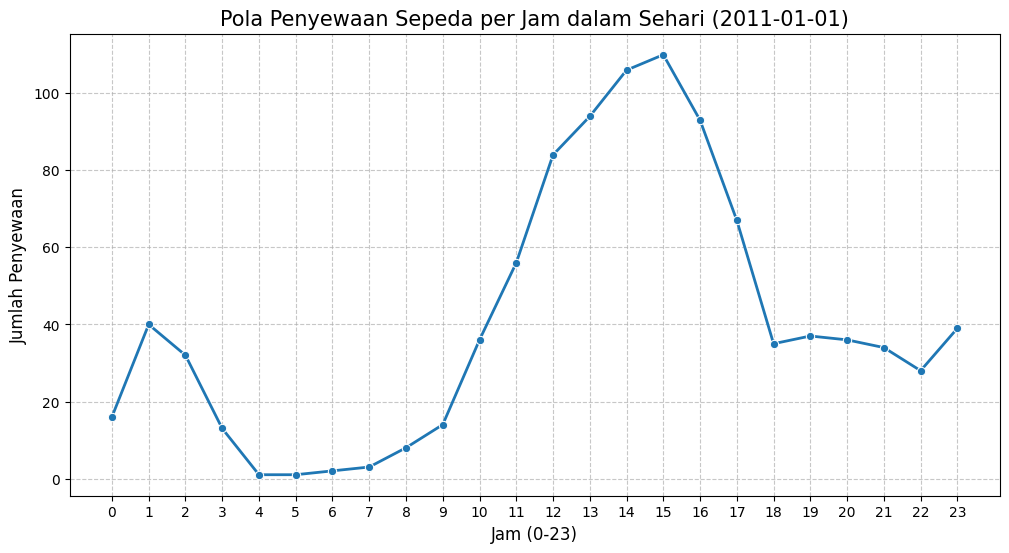

In [57]:
def visual_rental_pattern(df_hour_filter,date):
    df_hour_filter = df_hour[df_hour['dteday'] == date]

    plt.figure(figsize=(12, 6))
    sns.lineplot(x='hr', y='cnt', data=df_hour_filter, marker='o', linewidth=2)
    plt.title(f'Pola Penyewaan Sepeda per Jam dalam Sehari ({date})', fontsize=15)
    plt.xlabel('Jam (0-23)', fontsize=12)
    plt.ylabel('Jumlah Penyewaan', fontsize=12)
    plt.xticks(range(0, 24))
    plt.grid(True, linestyle='--', alpha=0.7)

visual_rental_pattern(df_hour,'2011-01-01')


visualisasi ini menggambarkan bagaimana pola penyewaan per jam dalam suatu hari, dapat dilihat bahwa rentang jam 12-18 jadi rentang jam yang paling banyak jumlah penyewaannya

C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\652115609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='Blues_d')


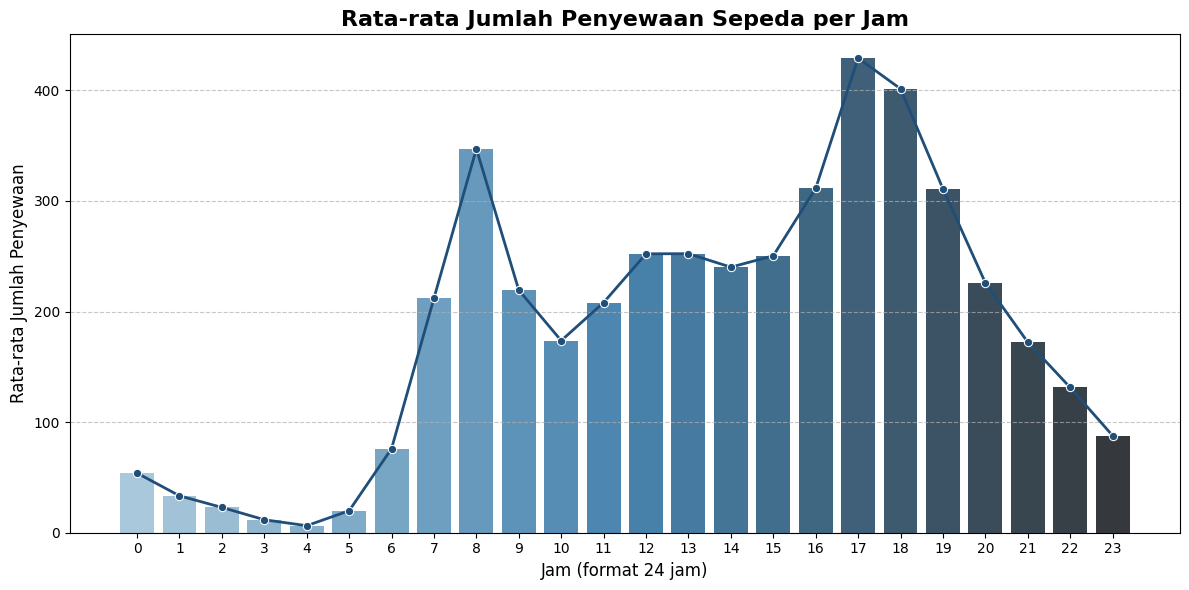

In [58]:
def visual_distributed_hour(df_hour_copy):
    hourly_rentals = df_hour_copy.groupby('hr')['cnt'].mean().reset_index()
    plt.figure(figsize=(12, 6))

    ax = sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='Blues_d')
    sns.lineplot(x='hr', y='cnt', data=hourly_rentals, color='#1F4E79', marker='o', linewidth=2)

    max_rental = hourly_rentals['cnt'].max()
    max_hour = hourly_rentals.loc[hourly_rentals['cnt'] == max_rental, 'hr'].values[0]

    plt.title('Rata-rata Jumlah Penyewaan Sepeda per Jam', fontsize=16, fontweight='bold')
    plt.xlabel('Jam (format 24 jam)', fontsize=12)
    plt.ylabel('Rata-rata Jumlah Penyewaan', fontsize=12)

    plt.xticks(rotation=0)

    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
visual_distributed_hour(df_hour_copy)

visualisasi ini membeirkan gambaran distribusi rata rata penyewaan per jam, masih memiliki nilai yang sinkron dengan visualisasi sebelumnya

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada musim apa penyewaan sepeda mencapai jumlah tertinggi?


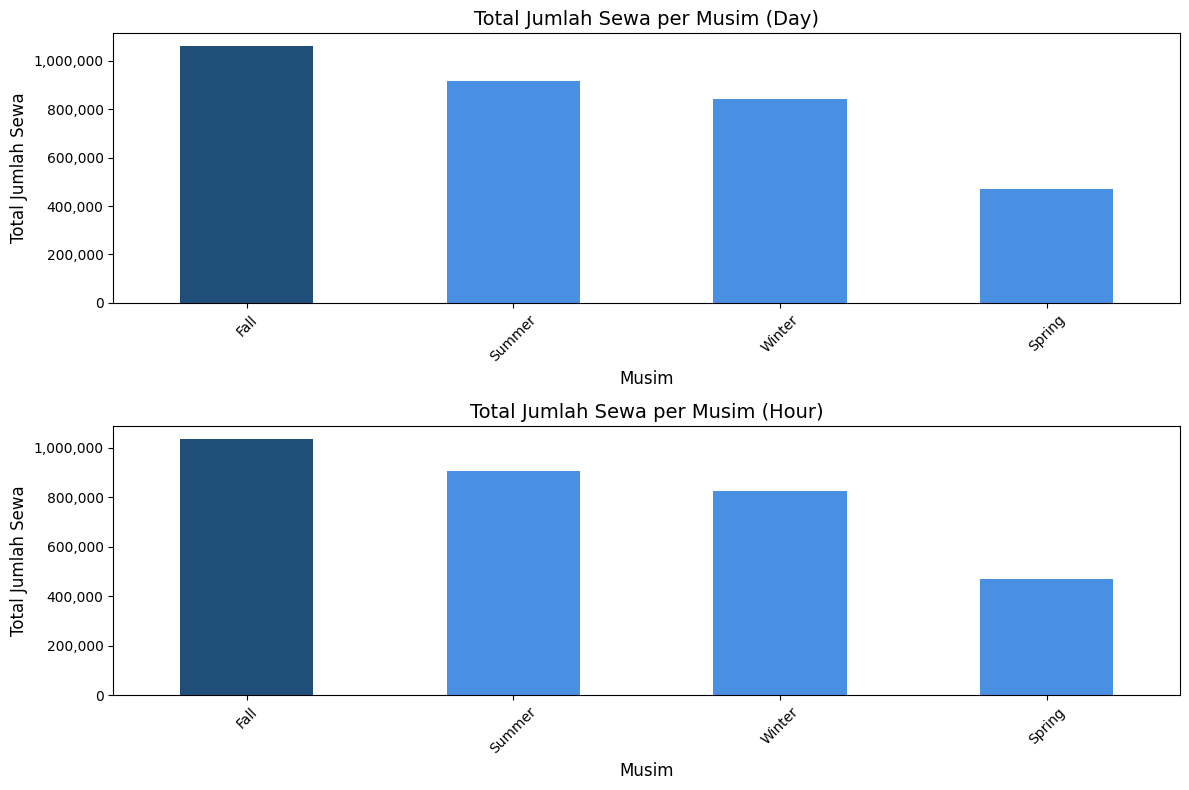

In [59]:
visual_relation_season(df_day,df_hour)

Musim gugur (Fall) adalah musim dengan jumlah penyewaan sepeda tertinggi, seperti yang terlihat dalam visualisasi. Musim panas (Summer) berada di posisi kedua, diikuti oleh musim dingin (Winter) di posisi ketiga, baik di dataset per jam maupun per hari

### Pertanyaan 2: Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\954841262.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='weathersit', y='cnt', data=df_day.sort_values(by='cnt',ascending=False), palette='viridis', inner='quartile', ax=ax[1, 0])
C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\954841262.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='weathersit', y='cnt', data=df_day.sort_values(by='cnt',ascending=False), jitter=True, alpha=0.5, palette='viridis', ax=ax[2, 0])
C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\954841262.py:23: UserWarning: 

The `scale` parameter is deprecated and will be removed in v0.15.0. You can now control the size of each plot element using matplo

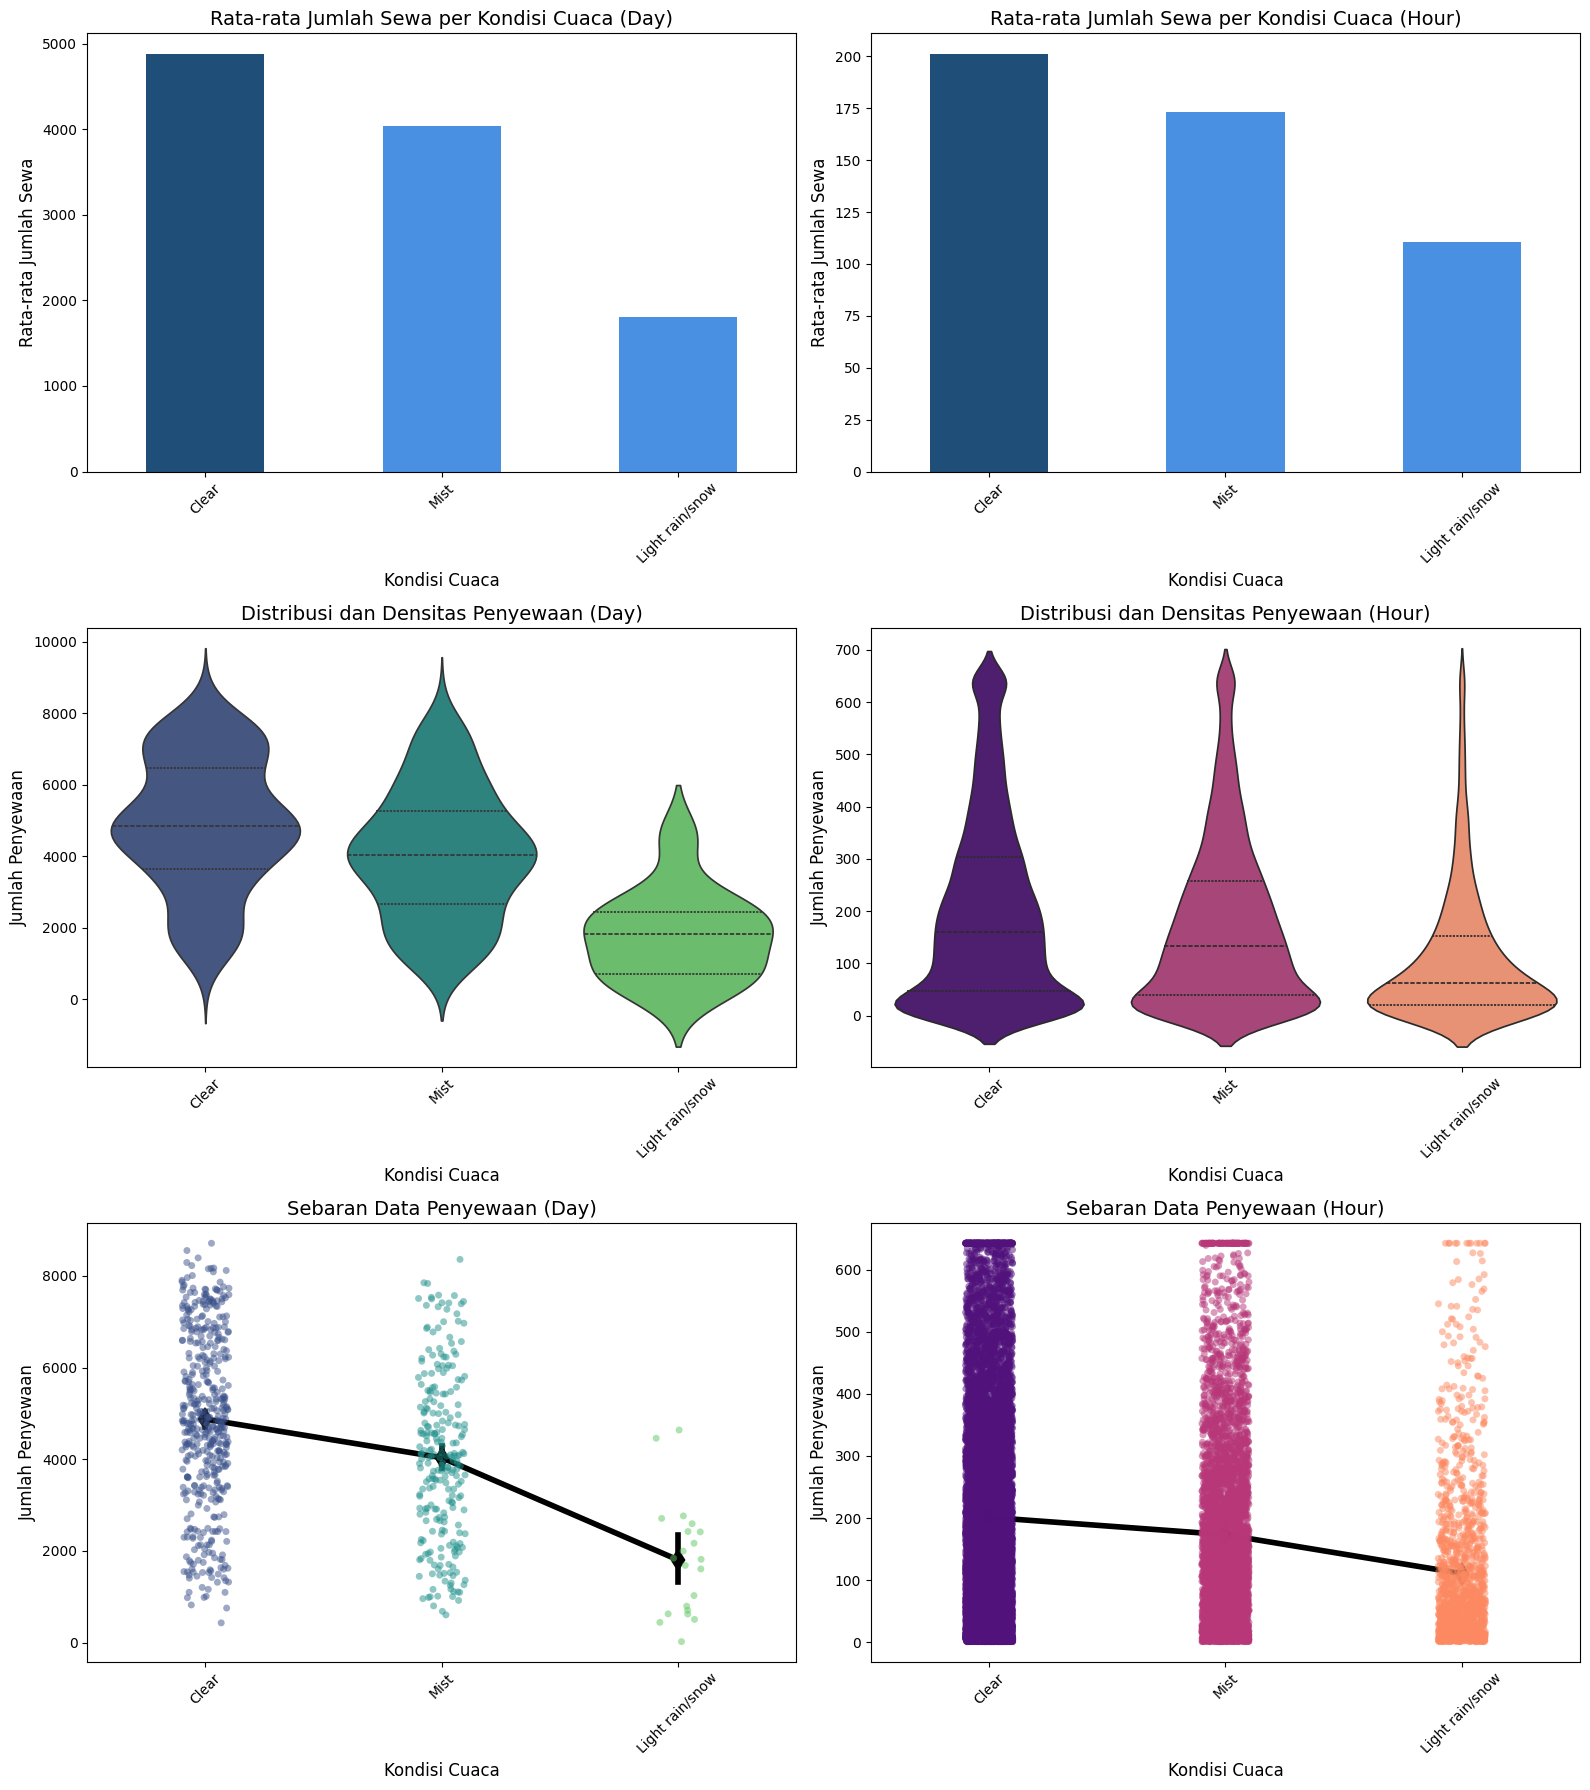

In [60]:
visual_relation(df_day,df_hour)

Visualisasi menunjukkan adanya hubungan linear antara jumlah penyewaan dengan kondisi cuaca. Baik rata-rata maupun persebaran jumlah sewa cenderung lebih tinggi pada kondisi cuaca cerah, baik dalam dataset per jam maupun per hari. Hal ini mengindikasikan bahwa cuaca memiliki korelasi positif dengan jumlah penyewaan.

### Pertanyaan 3: Pada waktu apa jumlah penyewaan sepeda paling tinggi dalam sehari?

C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\2424334115.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_hour_group_sum = df_hour_copy.groupby(by='hr_group')['cnt'].sum().sort_values(ascending=False)


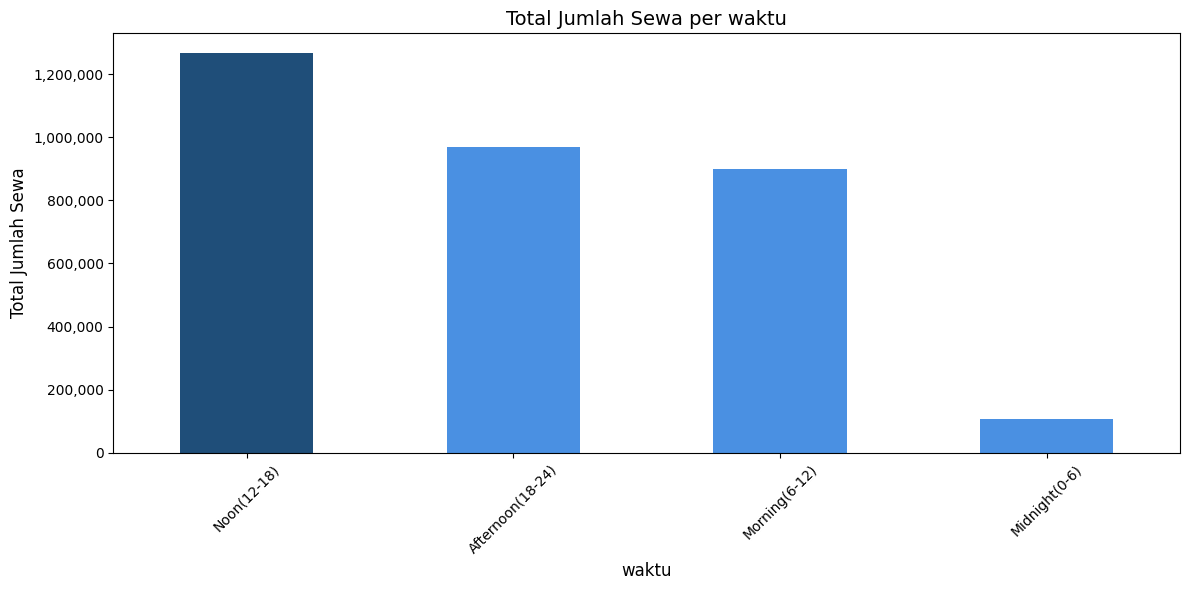

In [61]:
visual_relation_hour(df_hour_copy)

Visualisasi menggambarkan bahwa rentang jam 12-18 (Noon) memiliki jumlah penyewaan yang besar dibandingkan rentang jam lain

## Analisis Lanjutan (Opsional)

### Rata rata jumlah penyewaan sepeda per jam

C:\Users\alfth\AppData\Local\Temp\ipykernel_7776\652115609.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='hr', y='cnt', data=hourly_rentals, palette='Blues_d')


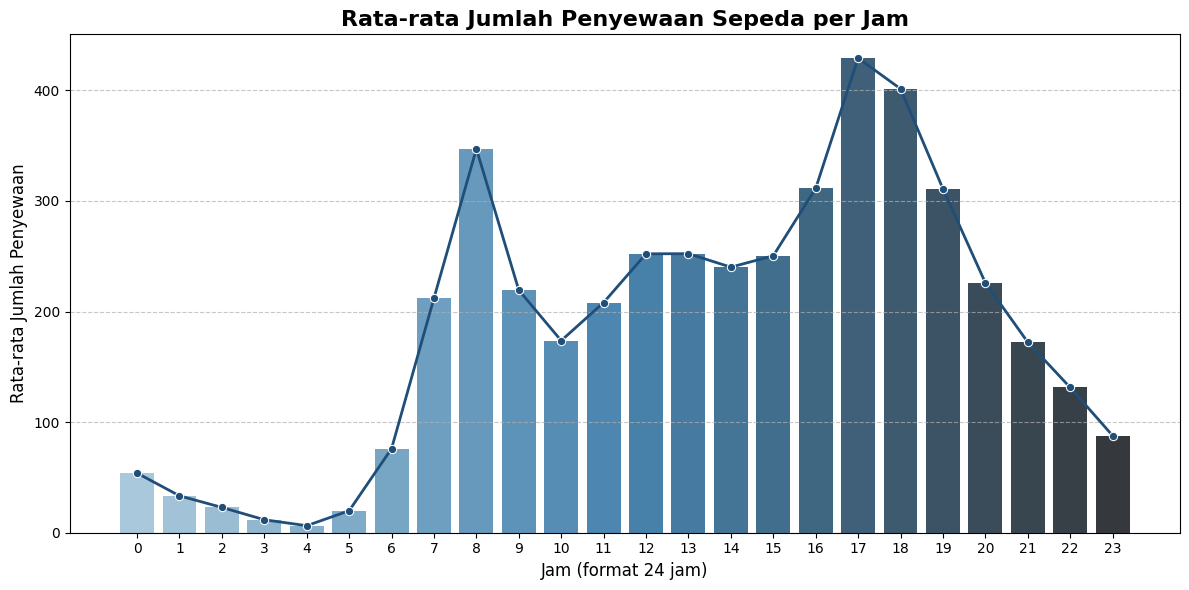

In [62]:
visual_distributed_hour(df_hour)

### Pola penyewaan per jam dalam sehari

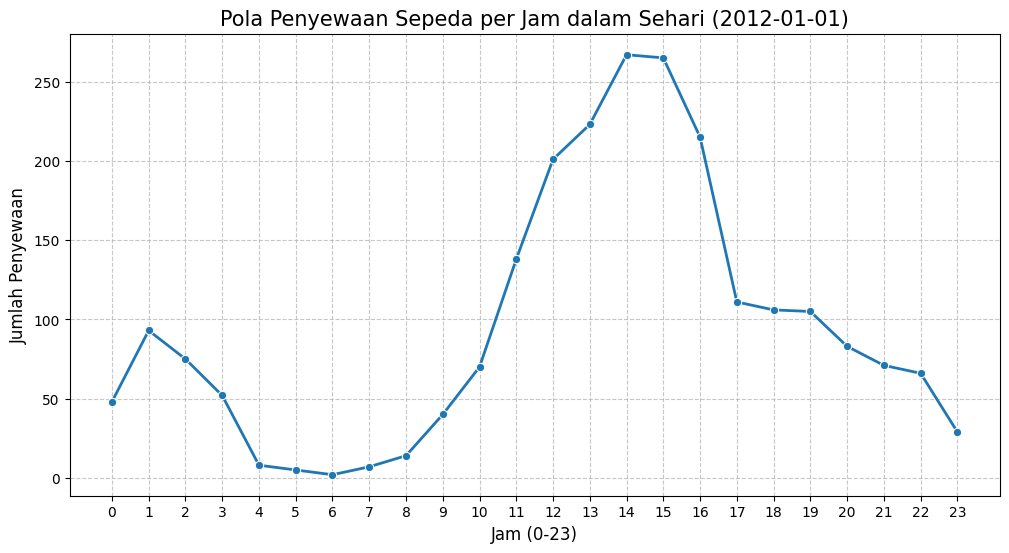

In [63]:
visual_rental_pattern(df_hour_copy, '2012-01-01')

## Conclusion

- Musim dengan Jumlah Penyewaan Tertinggi
Berdasarkan analisis data, jumlah penyewaan sepeda tertinggi terjadi pada musim gugur (fall), sedangkan musim semi (spring) memiliki jumlah penyewaan yang lebih rendah. Hal ini kemungkinan disebabkan oleh kondisi cuaca yang lebih stabil dan nyaman di musim gugur dibandingkan musim semi, yang mungkin masih dipengaruhi oleh curah hujan yang lebih tinggi atau suhu yang belum optimal untuk bersepeda.

- Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda
Jumlah penyewaan sepeda cenderung lebih tinggi pada kondisi cuaca yang cerah dibandingkan dengan cuaca mist atau light snow. Baik rata-rata maupun persebaran jumlah sewa menunjukkan pola peningkatan saat cuaca lebih baik. Hal ini menunjukkan bahwa cuaca memiliki korelasi positif dengan jumlah penyewaan—semakin baik kondisi cuaca, semakin tinggi tingkat penyewaan sepeda.

- Waktu dengan Jumlah Penyewaan Tertinggi dalam Sehari
Berdasarkan clustering per jam, jumlah penyewaan sepeda paling tinggi terjadi pada siang hari (sekitar pukul 12:00 - 18:00) dan pagi hari (sekitar pukul 06:00 - 12:00). Pola ini mencerminkan kebiasaan penggunaan sepeda baik sebagai alat transportasi untuk aktivitas sehari-hari seperti pergi bekerja atau sekolah, maupun untuk rekreasi di siang hari. Sebaliknya, jumlah penyewaan lebih rendah pada malam hingga dini hari, yang mungkin disebabkan oleh rendahnya kebutuhan bersepeda pada jam-jam tersebut.
